In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
data = load_breast_cancer()

cancer = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
cancer['target'] = data.target

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Plot binary target variable

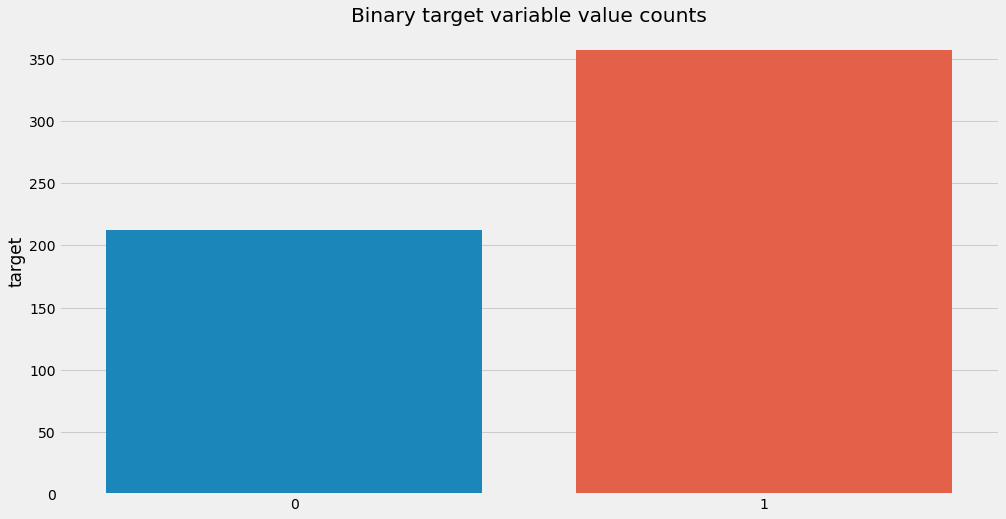

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = cancer.target.value_counts().index, y=cancer.target.value_counts())
plt.title('Binary target variable value counts')
plt.savefig('/Users/maximilianstaebler/Library/Mobile Documents/com~apple~CloudDocs/code/towardsdatascience/evaluation-metrics/plots/valuecounts.png')
plt.show();

# Train model and retrieve evaluation metrics

In [4]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Train Test Split
X = cancer.drop('target', axis = 1)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

X_train size: 426
y_train size: 426
X_test size: 143
y_test size: 143


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision:", round(metrics.precision_score(y_test, y_pred), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred), 4))

Accuracy: 0.94
Precision: 0.9327
Recall: 0.9898


# Create skewed dataset (imbalanced)

In [8]:
cancer2 = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
cancer2['target'] = 0

cancer3 = pd.concat([cancer, cancer2])
cancer3.target.value_counts()

0    781
1    357
Name: target, dtype: int64

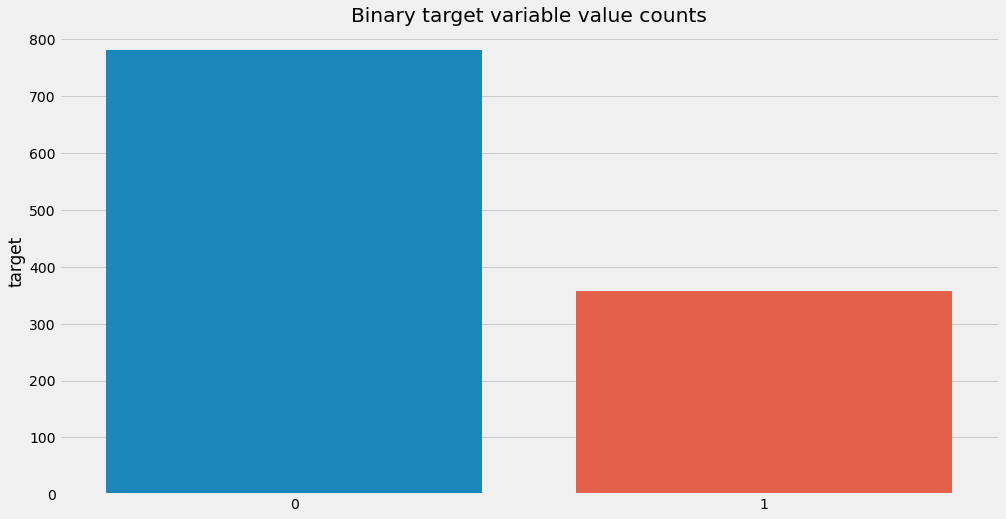

In [9]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = cancer3.target.value_counts().index, y=cancer3.target.value_counts())
plt.title('Binary target variable value counts')
plt.savefig('/Users/maximilianstaebler/Library/Mobile Documents/com~apple~CloudDocs/code/towardsdatascience/evaluation-metrics/plots/valuecounts_skewed.png')
plt.show();

In [10]:
# Train Test Split
X = cancer3.drop('target', axis = 1)
y = cancer3.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision:", round(metrics.precision_score(y_test, y_pred), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred), 4))

X_train size: 853
y_train size: 853
X_test size: 285
y_test size: 285
Accuracy: 0.71
Precision: 0.5309
Recall: 0.4943


## Thresholds

Use new `spam` dataset.

In [11]:
from sklearn import svm, datasets

# Load the dataset and split into train/test splits
data = pd.read_csv('spam.csv')
X = data.drop(['target', 'Unnamed: 0'], axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [12]:
X.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259


# Evaluate Classification with Yellowbrick

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show(outpath="./plots/discriminationthreshold.png")   

In [ ]:
from yellowbrick.classifier import confusion_matrix

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=[0, 1]
)
plt.tight_layout()

In [ ]:
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="./plots/roc_auc.png");

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(LogisticRegression(random_state=7))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show(outpath="./plots/precisionrecallcurve.png");

# Regression

In [17]:
from sklearn.datasets import load_boston

In [18]:
data = load_boston()

boston = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
boston['target'] = data.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# Load Data
data = load_boston()
# Load a regression dataset
X, y = data.data, data.target

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

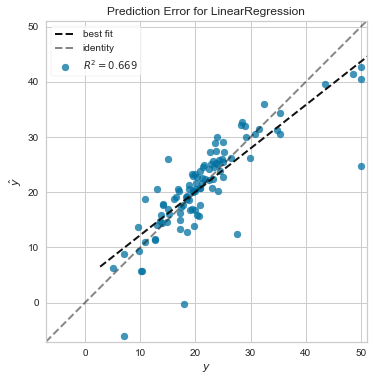

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = boston.drop('target', axis = 1), boston['target']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="./plots/regression_linear.png")                 # Finalize and render the figure

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

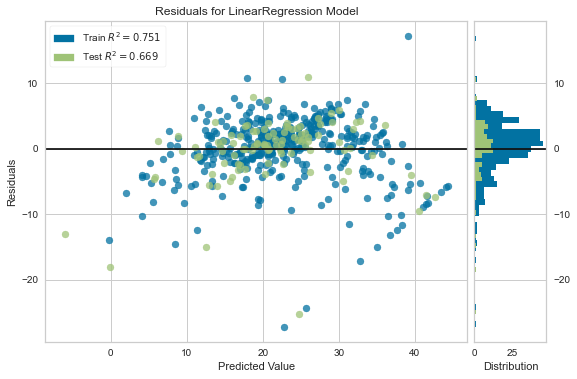

In [38]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge, Lasso
model = LinearRegression(normalize=True)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="./plots/residuals.png")

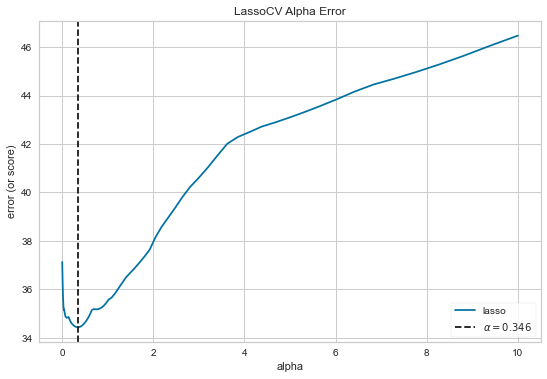

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV, LogisticRegression
from yellowbrick.regressor import AlphaSelection

# Data
X, y = data.data, data.target

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

In [58]:
from sklearn import svm
svc = svm.SVR(kernel='linear')
svc.fit(X_train, y_train)

SVR(kernel='linear')

In [59]:
preds_svr = svc.predict(X_test)

In [49]:
model_lin = LinearRegression(normalize=True)
model_lasso = LassoCV(alphas=[0.346])

In [50]:
model_lin.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

LassoCV(alphas=[0.346])

In [51]:
preds_lin = model_lin.predict(X_test)
preds_lasso = model_lasso.predict(X_test)

In [52]:
print(f'MSE: {mean_squared_error(y_test, preds_lin)}')
print(f'RMSE: {mean_squared_error(y_test, preds_lin, squared=False)}')
print(f'R2: {r2_score(y_test, preds_lin)}')

MSE: 24.291119474973517
RMSE: 4.928602182665336
R2: 0.668759493535632


In [53]:
print(f'MSE: {mean_squared_error(y_test, preds_lasso)}')
print(f'RMSE: {mean_squared_error(y_test, preds_lasso, squared=False)}')
print(f'R2: {r2_score(y_test, preds_lasso)}')

MSE: 24.61306309355613
RMSE: 4.961155419209938
R2: 0.6643693802112072


In [60]:
print(f'MSE: {mean_squared_error(y_test, preds_svr)}')
print(f'RMSE: {mean_squared_error(y_test, preds_svr, squared=False)}')
print(f'R2: {r2_score(y_test, preds_svr)}')

MSE: 29.435908618391455
RMSE: 5.425486947582812
R2: 0.5986037082794649
